<a href="https://colab.research.google.com/github/cfoli/EMG-based-Gesture-Recognition/blob/main/EMGNet_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is my local copy of the ANN model developed by (Dr.Bilal, on Kaggle) for Gesture prediction based on recorded 8-channel EMG data. The model is henceforth dubbed 'EMG-Net'

# Load EMG Signal for gesture recognition

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

In [ ]:
emg_df = pd.read_csv('//content/drive/MyDrive/ML Projects/EMG Gesture Prediction/Datasets/EMG-data.csv')
print(emg_df.head())
print(emg_df.shape)

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1  
(4237907, 11)


In [ ]:
print("class :", emg_df["class"].unique())
print()
#print("Labels :",df["label"].unique()) # 36 people hand gesture data
#print()
print("Num. samples per class/gesture (all subjects) :\n",emg_df["class"].value_counts())
print("Num. samples per subject :\n",emg_df["label"].value_counts())


class : [0 1 2 3 4 5 6 7]

Num. samples per class/gesture (all subjects) :
 class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64
Num. samples per subject :
 label
13    153240
30    148561
11    147326
2     136426
7     132640
17    132085
34    131202
18    129312
12    128551
20    127853
9     127647
10    123089
32    122930
1     121170
22    119629
21    119247
8     117948
24    116940
25    116747
23    115619
4     114198
33    112105
19    109906
5     107248
27    106799
26    106154
29    105987
3     105785
16    105501
15    105396
36    101754
14    101003
6      99619
35     99501
28     97766
31     91023
Name: count, dtype: int64


In [ ]:
print("Num. samples per subject :\n",emg_df["time"].value_counts())

Num. samples per subject :
 time
44942    72
44966    72
61       72
44940    72
44952    72
         ..
93785     1
93784     1
93783     1
93782     1
93792     1
Name: count, Length: 84830, dtype: int64


In [ ]:
features = emg_df.drop(columns=["label","class","time"])
display(features.head())
print(features.shape)


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001


(4237907, 8)


In [ ]:
gesture = emg_df["class"]
print(gesture.unique())
print(gesture.shape)

[0 1 2 3 4 5 6 7]
(4237907,)


# Train-test Split

---



In [ ]:
# split in training 70%, validation 10 %,  test 20% test
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(features, gesture, test_size=0.2, random_state=1)
print(f"train shape: {x_train.shape}")
print(f"test shape: {x_test.shape}")


train shape: (3390325, 8)
test shape: (847582, 8)


In [ ]:
# Normalizing data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [ ]:
# one hot encoding Labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Build & Compile EMGNet Model

---



In [ ]:
def build_EMGNet(num_electrodes=8, num_gestures=8):
  from tensorflow.keras import layers, Sequential, optimizers, Input, Model

  input_tensor = Input(shape=(num_electrodes,))
  x = layers.Dense(1024, activation='relu')(input_tensor)
  y = layers.Dense(512, activation='relu')(x)
  z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers (not doing what it's intended)
  z = layers.Dense(64, activation='relu')(z)
  z = layers.Dense(32, activation='relu')(z)
  output_tensor = layers.Dense(num_gestures, activation='softmax')(z)

  model = Model(input_tensor, output_tensor)

  #SGD #RMSprop #Adam #Adadelta #Adagrad ##Adamax ###Nadam #Ftrl
  opt = optimizers.Nadam(learning_rate=1e-3)
  model.compile(optimizer = opt,
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])
  return model

model = build_EMGNet()
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1024)                │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,280 (2.33 MB)

 Trainable params: 610,280 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # Plot model architecture
# from tensorflow.keras.utils import plot_model

# # Save model diagram as an image
# plot_model(model, to_file="model_architecture.png", show_shapes=True)


# Define Callbacks

---



In [ ]:
import tensorflow as tf
import os

def callbacks(log_dir,early_stopping_patience = 2):
    """
    Create TensorBoard logging, early stopping, and model checkpoint callbacks.

    Args:
    log_dir (str): Base directory for logs.
    model_dir (str): Subdirectory where logs and models will be stored.

    Returns:
    list: List of TensorFlow callbacks.
    """
    # Define paths
    model_path = os.path.join(log_dir, "best_model.keras")  # Model file path
    tensorboard_logdir = os.path.join(log_dir, "tensorboard_logs")  # TensorBoard logs

    # Ensure directories exist
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    os.makedirs(tensorboard_logdir, exist_ok=True)

    # Define callbacks
    callbacks_list = [
        tf.keras.callbacks.TensorBoard(
            log_dir=tensorboard_logdir,  # TensorBoard log path
            histogram_freq=1
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',  # Stop if validation accuracy does not improve
            patience=early_stopping_patience,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ModelCheckpoint(
            filepath=model_path,  # Save model path
            monitor='val_loss',  # Save only the best model
            save_best_only=True
        ),
        # Uncomment if you want learning rate reduction on plateau
        # tf.keras.callbacks.ReduceLROnPlateau(
        #     monitor='val_loss',
        #     factor=0.1,  # Reduce learning rate by a factor of 0.1
        #     patience=10
        # )
    ]

    return callbacks_list



# Train Model

---



In [ ]:
model_num = 1
log_dir = '/content/drive/MyDrive/ML Projects/EMG Gesture Prediction/Results/EMGNet_Callbacks/Model_'+str(model_num)

callback_list = callbacks(log_dir,early_stopping_patience=10)

batch_size = 512
num_epochs = 250

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = num_epochs,
                    validation_split = 0.2, callbacks=callback_list)

# Save training history to pickle
history_filename = 'training_history.pkl'
filepath = os.path.join(log_dir, history_filename)
import pickle

with open(filepath, 'wb') as hist_file:
    pickle.dump(history.history, hist_file)


# Load Saved Best Model From Training

---



In [ ]:
# loading saved model

from tensorflow.keras.models import load_model

model_num  = 1
EMGNet_model = load_model('/content/drive/MyDrive/ML Projects/EMG Gesture Prediction/Results/EMGNet_Callbacks/Model_'+str(model_num)+'/best_model.keras')
EMGNet_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1024)                │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,830,843 (6.98 MB)

 Trainable params: 610,280 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,220,563 (4.66 MB)

# Evaluate Model Performance on Test Set

---



In [ ]:
# Evaluate the model
_, accuracy_train = EMGNet_model.evaluate(x_train, y_train, verbose=1)
_, accuracy_test  = EMGNet_model.evaluate(x_test, y_test, verbose=1)

print(f"Training accuracy: {accuracy_train * 100:.2f}% | Test accuracy: {accuracy_test * 100:.2f}%")
# print(f"Test accuracy: {accuracy_test * 100:.2f}%")


105948/105948 ━━━━━━━━━━━━━━━━━━━━ 188s 2ms/step - accuracy: 0.9497 - loss: 0.1649
26487/26487 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.9346 - loss: 0.3058
Train accuracy: 94.68% | Test accuracy: 93.47%


# Load & Plot Training Output Metrics

---



<ipython-input-66-635247dade85>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


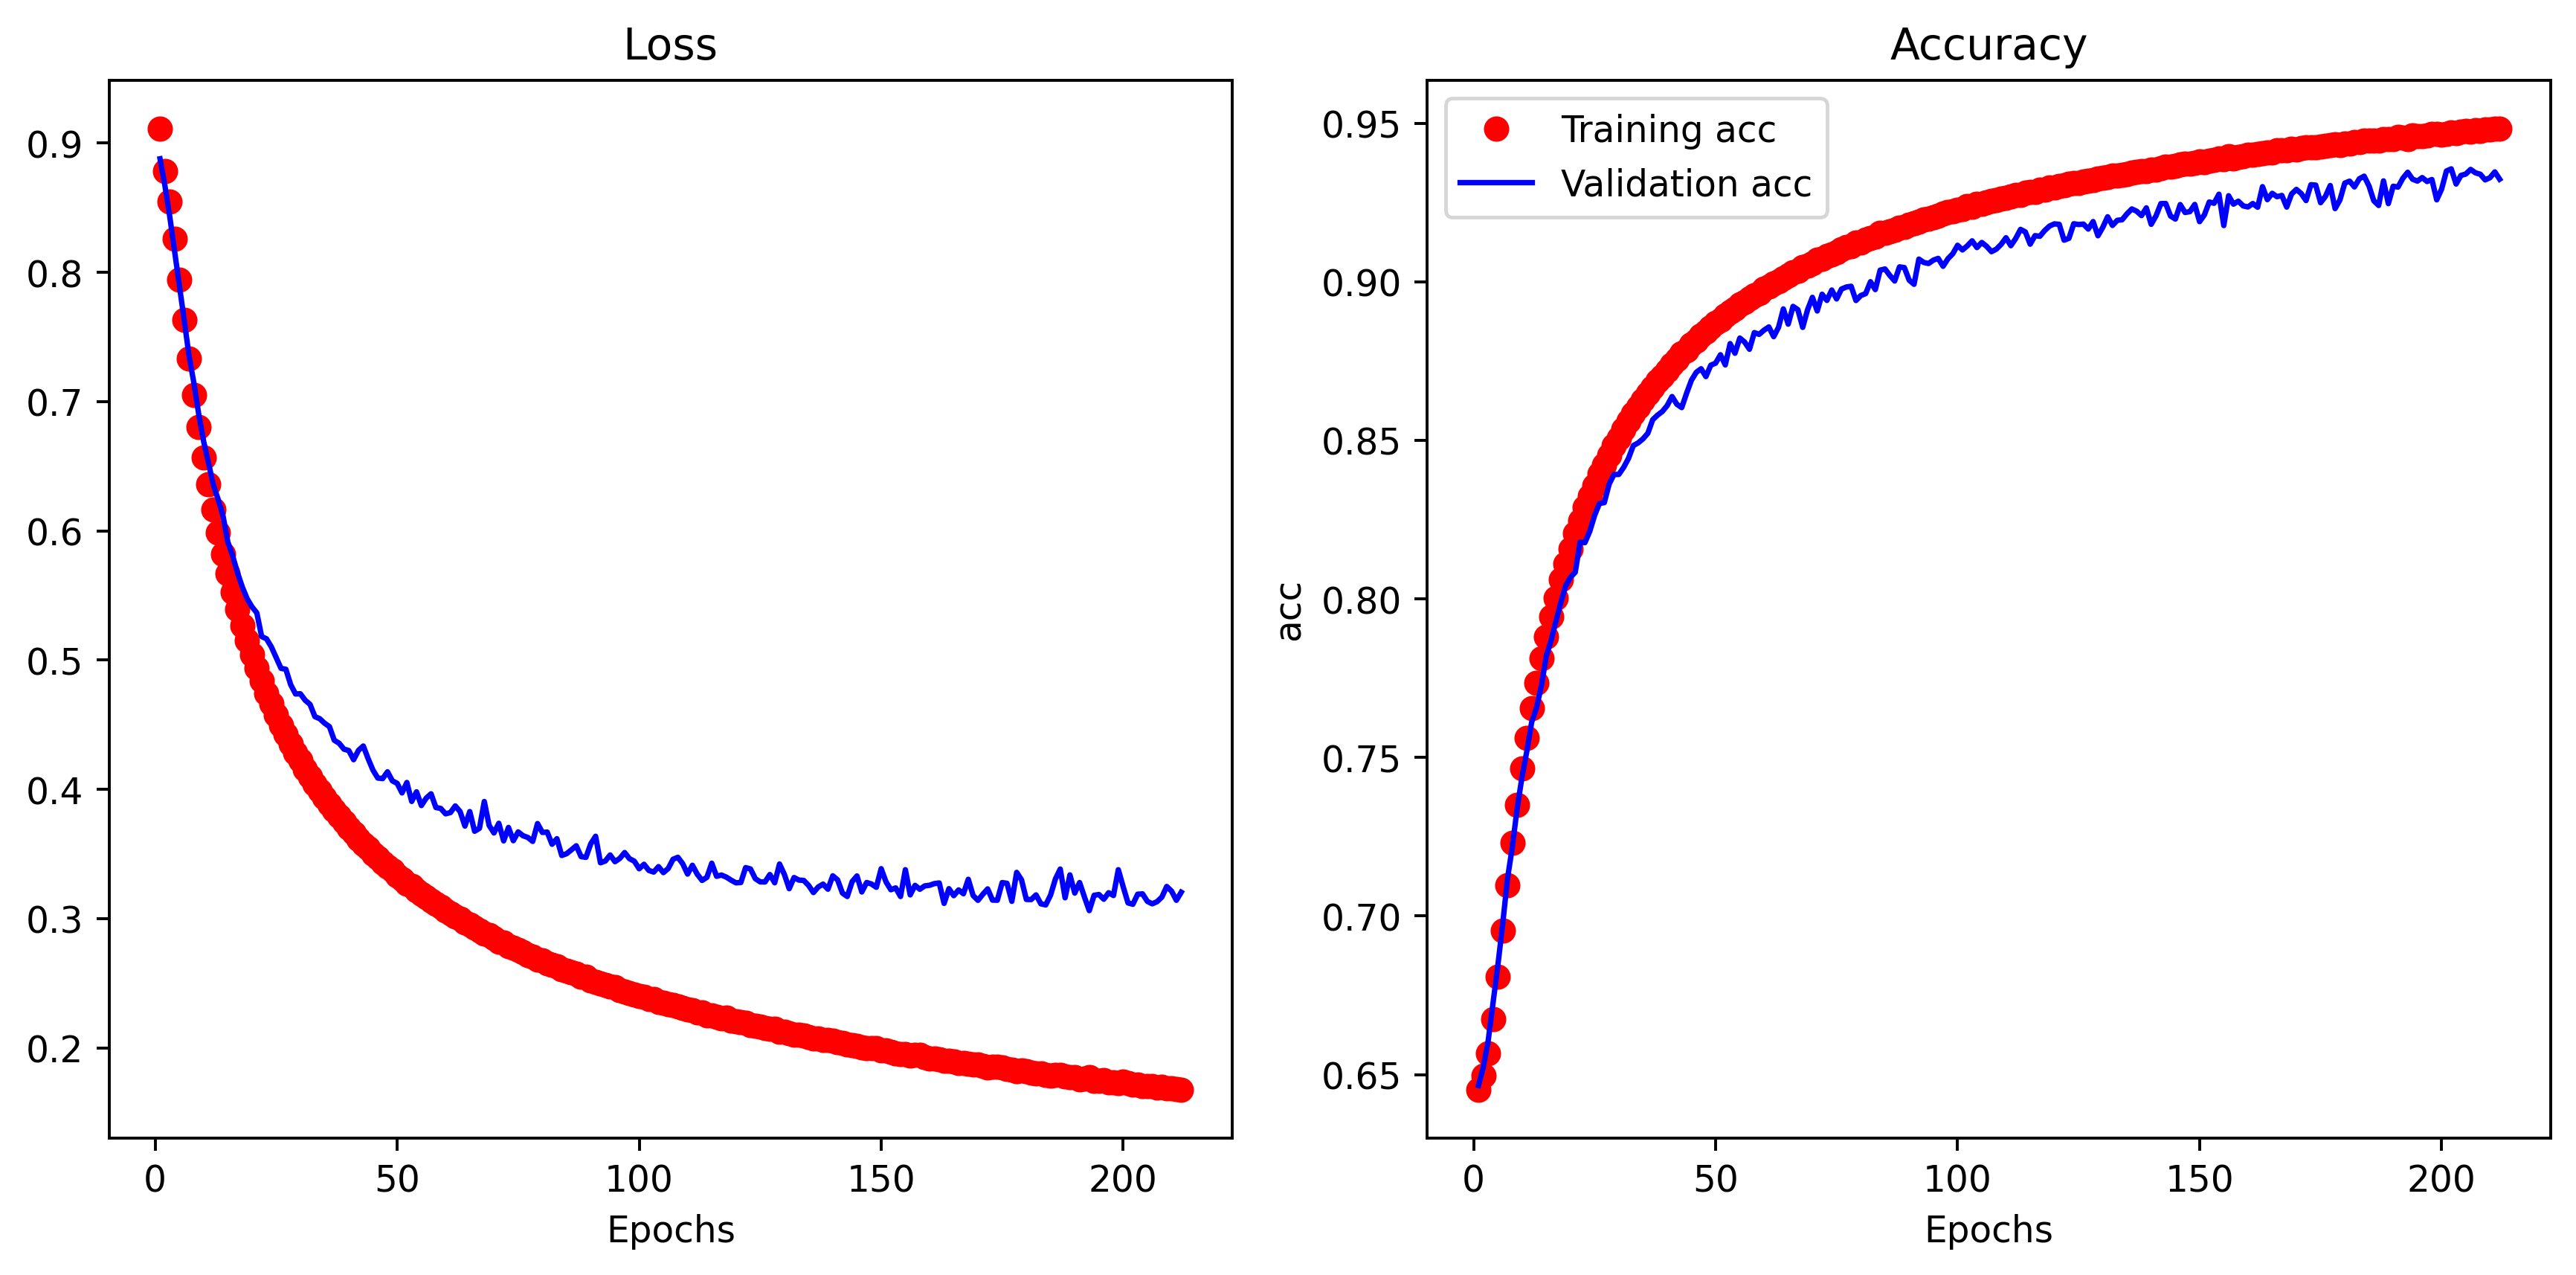

In [ ]:

def plot_output_metrics(history):

    loss = history['loss']
    val_loss = history['val_loss']
    acc = history['accuracy']
    val_acc = history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=350)  # Adjusted for 1 row, 2 columns
    axes = axes.flatten()

    epochs = range(1, len(loss) + 1)

    axes[0].plot(epochs, loss, 'ro', label='Training loss')
    axes[0].plot(epochs, val_loss, 'b', label='Validation loss')
    # plt.title('Training and validation loss')
    axes[0].set_title('Loss')
    axes[0].set_xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    epochs = range(1, len(acc) + 1)

    axes[1].plot(epochs, acc, 'ro', label='Training acc')
    axes[1].plot(epochs, val_acc, 'b', label='Validation acc')
    # plt.title('Training and validation acc')
    axes[1].set_title('Accuracy')
    axes[1].set_xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Load the training history
model_num = 1
log_dir   = '/content/drive/MyDrive/ML Projects/EMG Gesture Prediction/Results/EMGNet_Callbacks/Model_'+str(model_num)
history_filename = 'training_history.pkl'
filepath = os.path.join(log_dir, history_filename)
import pickle

with open(filepath, 'rb') as hist_file:
    history = pickle.load(hist_file)

plot_output_metrics(history)


In [ ]:
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])